# CH01. 파이썬 기반의 머신러닝과 생태계 이해
## 01. 머신러닝의 개념
머신러닝: 데이터를 기반으로 패턴을 학습하고 결과를 예측하는 알고리즘 기법
- 지도학습 / 비지도학습 / 강화학습
## 02. 파이썬 머신러닝 생태계를 구성하는 주요 패키지
- 머신러닝, 행렬/선형대수/통계, 데이터 핸들링, 시각화
## 03. 넘파이
넘파이: Numerical Python을 의미, 파이썬에서 선형대수 기반의 프로그램을 쉽게 만들 수 있도록 지원하는 대표적인 패키지

In [ ]:
import numpy as np

- 기반 데이터 타입: ndarray
- array() 함수는 파이썬의 리스트와 같은 다양한 인자를 입력받아서 ndarray로 변환하는 기능 수행
## 04. 데이터 핸들링 - 판다스
- 판다스의 핵심 객체: DataFrame


In [ ]:
import pandas as pd



---

# CH10. 시각화
## 01. 시각화를 시작하며 - 맷플롯립과 시본 개요
시본: 맷플롯립보다 쉬운 구현, 수려한 시각화, 편리한 판다스와의 연동
## 02. 맷플롯립
- pyplot을 통해 시각화 구현


In [ ]:
import matplotlib.pyplot as plt

- plot() 함수: 선 그래프
- title() 함수: 차트 타이틀
- show(): 선 그래프를 화면에 나타냄
- figure 객체: 캔버스의 역할
- axes: 실제 그림을 그리는 메서드들을 가짐
## 03. 시본
- histplot() 함수: 히스토그램
- displot() 함수: 히스토그램, figure 레벨 함수
- countplot() 함수: 이산형 값의 건수를 막대 그래프로 시각화
- barplot() 함수: 막대 그래프 형태의 플롯
- boxplot() 함수: 상자 수염 그래프
- violinplot() 함수: 바이올린 플롯
- scatterplot() 함수: 산점도
- heatmap() 함수: 상관 히트맵


### 코드

In [ ]:
import pandas as pd

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


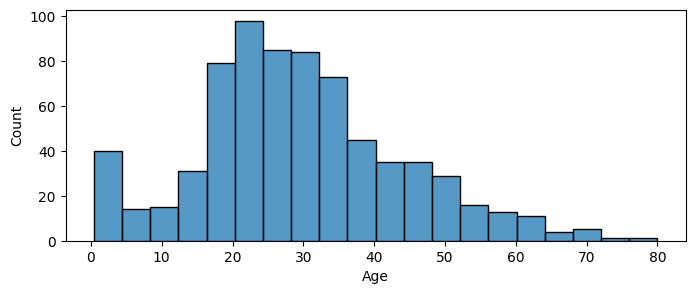

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본에서도 plt.figure()의 figsize 인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(8,3))

# DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당, ylabel 값은 Count로 설정.
sns.histplot(titanic_df['Age'], bins = 20)
plt.show()

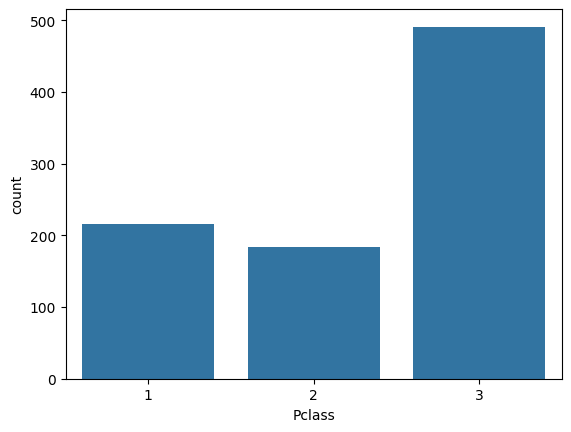

In [ ]:
sns.countplot(x = 'Pclass', data = titanic_df)
plt.show()

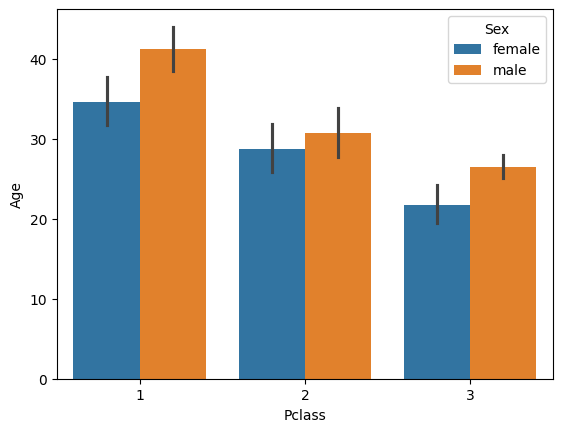

In [ ]:
# 아래는 Pclass가 X축값이며 hue 파라미터로 Sex를 설정
# 개별 Pclass 값별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x = 'Pclass', y = 'Age', hue = 'Sex', data = titanic_df)
plt.show()

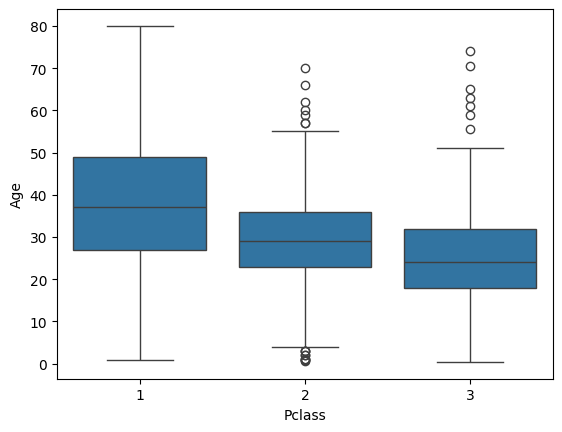

In [ ]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_df)
plt.show()

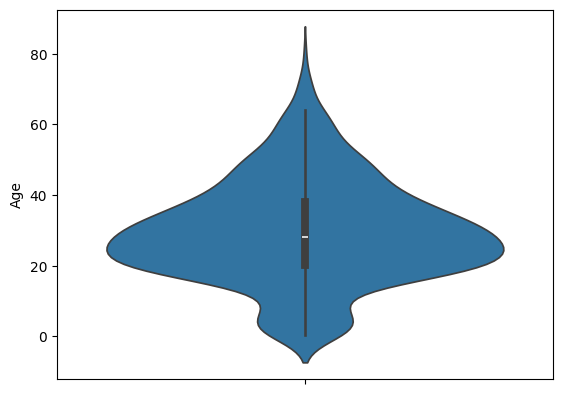

In [ ]:
# Age 칼럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y = 'Age', data = titanic_df)
plt.show()

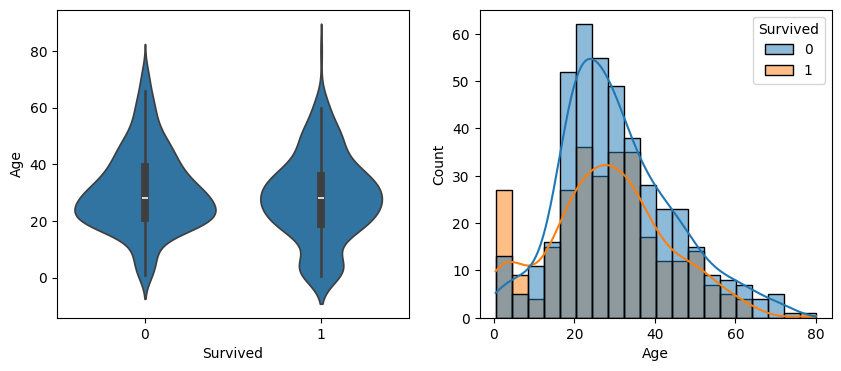

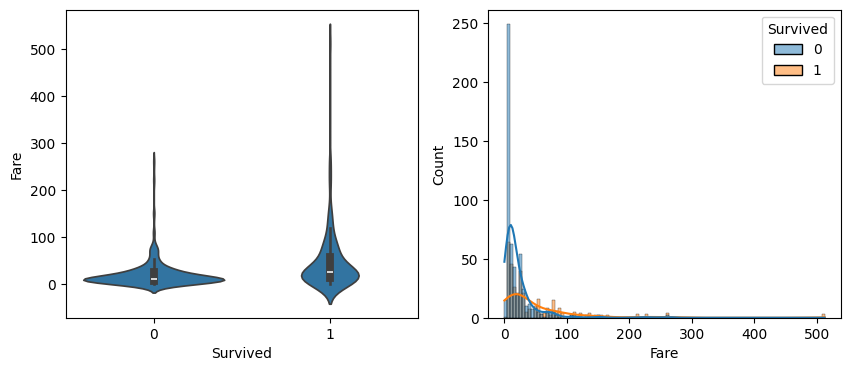

In [ ]:
cont_columns = ['Age', 'Fare']

# 리스트로 할당된 칼럼들의 개수만큼 루프 수행.
for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화, nrows는 1, ncols=2인 서브플롯 생성.
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
    # 왼쪽 Axes 객체에는 Survived값 0, 1별 개별 칼럼의 바이올린 플롯 시각화.
    sns.violinplot(x = 'Survived', y = column, data = titanic_df, ax = axs[0])
    # 오른쪽 Axes 객체에는 Survived 값에 따른 개별 칼럼의 히스토그램 시각화
    sns.histplot(x = column, data = titanic_df, kde = True, hue = 'Survived', ax = axs[1])

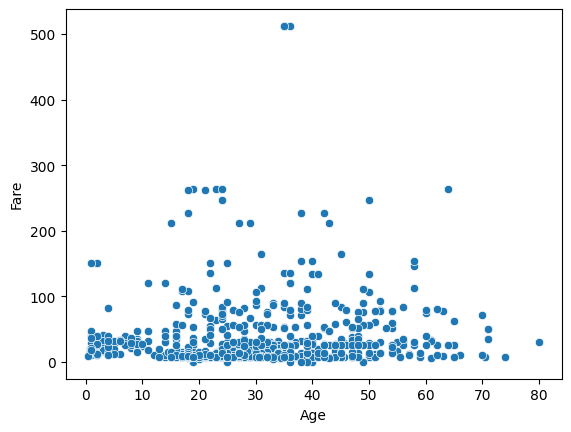

In [ ]:
# X축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x = 'Age', y = 'Fare', data = titanic_df)
plt.show()

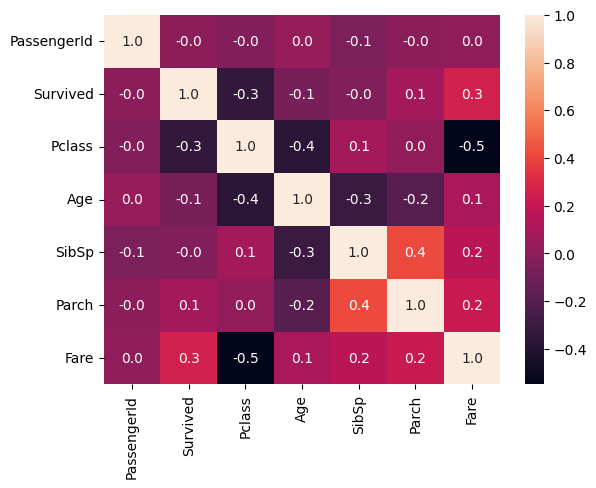

In [ ]:
sns.heatmap(corr, annot = True, fmt = '.1f', cbar = True)
plt.show()



---

# CH12. 시계열 데이터
## 01. datetime 오브젝트
datetime 라이브러리: 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
- date / time / datetime 오브젝트

In [ ]:
from datetime import datetime

- to_datetime 메서드: 문자열을 datetime 오브젝트로 변환
- dt 접근자: datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있음


---

# CH02. 사이킷런으로 시작하는 머신러닝
## 01. 사이킷런 소개와 특징
## 02. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
- 분류: 대표적인 지도학습 방법의 하나.
- sklearn.model_selection: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
- ML 알고리즘은 의사 결점 트리 알고리즘으로 이를 구현한 DecisionTree Classifier를 적용함
- train_test_split() 함수를 사용하여 데이터 세트를 학습 데이터와 테스트 데이터로 분리
- DecisionTreeClassifier 객체 생성 후 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행, predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환하게 됨
- accuracy_score() 함수를 통해 정확도 측정
## 03. 사이킷런의 기반 프레임워크 익히기
- 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공
- 사이킷런은 분류 알고리즘을 구현한 클래스를 Clssifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭
- Classifier와 Regressor를 합쳐서 Estimator라고 부름
## 04. Model Selection 모듈 소개
- model_selection 모듈을 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공
- 교차검증: 데이터의 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것
- K 폴드 교차검증; 가장 보편적으로 사용되는 교차 검증 기법. K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- KFold와 StratifierKFold 클래스 제공
- Stratified K 폴드: 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식
- cross_val_score(): 교차검증 과정을 한꺼번에 수행해주는 API
- GridSearchCV: 교차검증과 최적 하이퍼 파라미터 튜닝을 한 번에 수행
## 05. 데이터 전처리
- 결손값 처리, 문자열 처리
- 데이터 인코딩: 레이블 인코딩 / 원-핫 인코딩
- 레이블 인코딩: 문자열 값을 숫자형 카테고리 값으로 변환
- 원-핫 인코딩: 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
- 피처스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화 / 정규화
- StandardScaler: 표준화를 쉽게 지원하기 위한 클래스. 평균이 0이고, 분산이 1인 값으로 변환
- MinMaxScaler: 데이터값을 0과 1 사이의 범위 값으로 반환
# CH03. 평가
- 정확도 / 오차행렬 / 정밀도 / 재현율 / F1 스코어 / ROC AUC
## 01. 정확도
- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단
## 02. 오차 행렬
- 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
- confusion_matrix() API 사용
## 03. 정밀도와 재현율
- 정밀도: 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- 재현율: 실제 값이 Positive인 대상 중에 에측과 실제 값이 Positive로 일치한 데이터의 비율
- 정밀도 / 재현율 트레이드오프: 정밀도와 재현율을 상호보완적인 평가 지표
## 04. F1 스코어
- F1 스코어: 정밀도와 재현율을 결합한 지표. 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
- f1_score() API tkdyd
## 05. ROC 곡선과 AUC
- ROC 곡선: 수신자 판단 곡선. FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선
# CH04. 분류
## 01. 분류의 개요
- 지도학습의 대표적인 유형
- 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
- 앙상블: 배깅 / 부스팅
## 02. 결정 트리
- 결정 트리: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적
## 03. 앙상블 학습
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말함
- 보팅 / 배깅 / 부스팅
- 보팅: 하드 보팅 / 소프트 보팅
## 04. 랜덤 포레스트
- 배깅: 같은 알고리즘으로 여러 개의 분류기를 반들어서 보팅으로 최종 결정하는 알고리즘
- 랜덤 포레스트: 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨
## 05. GBM
- Gradient Boost Machine: 가중치 업데이트를 경사 하강법을 이용
## 06. XGBoost
- 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능
- 분류를 위한 래퍼 클래스인 XGBoostClassifier, 회귀를 위한 래퍼 클래스인 XGBRegressor
## 07. LightGBM
- 리프 중심 트리 분할 방식 사용
- 분류를 위한 LGBMCLassifier, 회귀를 위한 LGBMRegressor
## 08. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝
- 베이지안 최적화: 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식


---

## 11. 스태킹 앙상블
- 스태킹: 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출. 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행




---

### 코드
- LightGBM 하이퍼 파라미터

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimator는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    f1=f1_score(y_test, pred)

    #ROC-AUC 추가
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)

    #ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall,f1,roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도:0.9561, 정밀도:0.9615, 재현율0.9740, F1:0.9677, AUC:0.9877


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

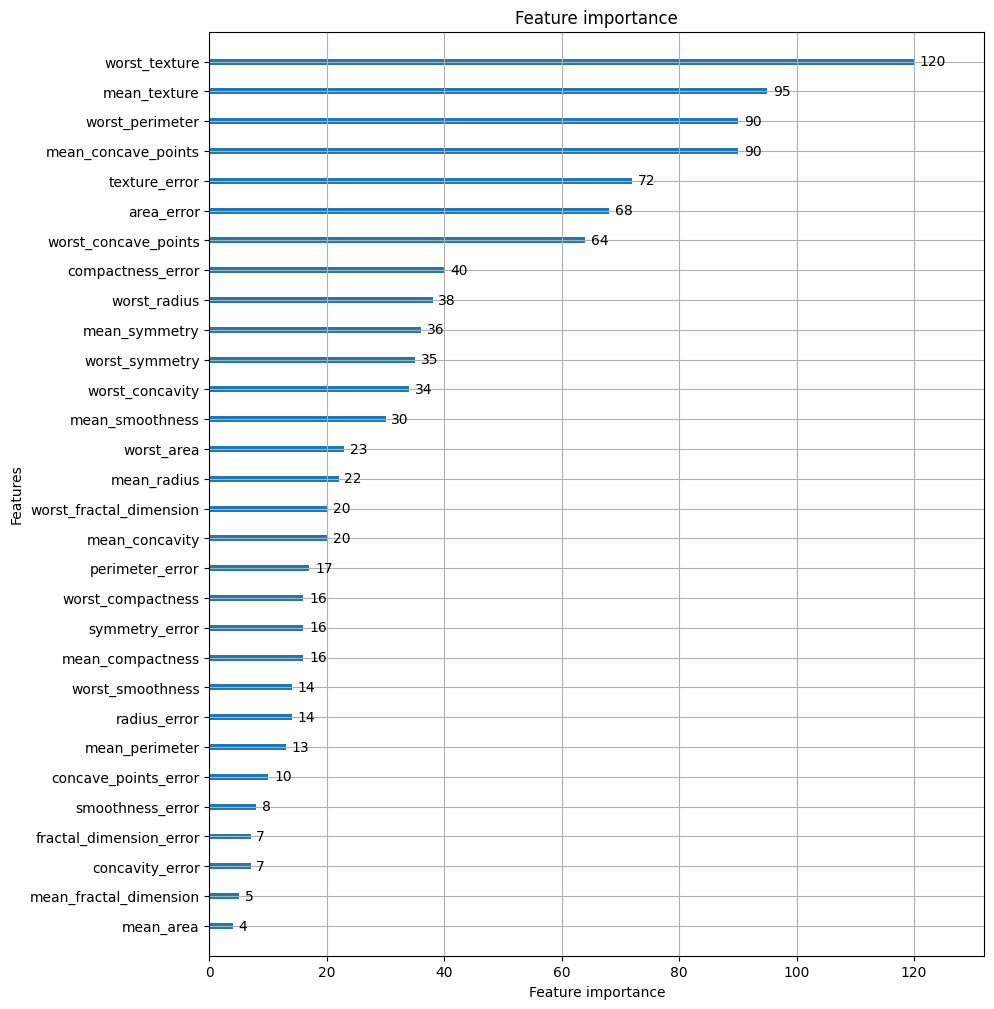

In [ ]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

- 하이퍼 파리미터 튜닝

In [ ]:
params = {
    'max_depth':[10,20,30,40,50], 'num_leaves':[35,45,55,65],
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9], 'subsample':[0.5,0.6,0.7,0.8,0.9],
    'min_child_weight':[10,20,30,40], 'reg_alpha':[0.01,0.05,0.1]
}

In [ ]:
from hyperopt import hp

# -10~10까지 1간격을 가지는 입력 변수 x와 -15~15까지 1간격으로 입력 변수 y 설정.
search_space = {'x':hp.quniform('x', -10, 10, 1), 'y':hp.quniform('y', -15, 15, 1)}

In [ ]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x**2 - 20*y

  return retval

In [ ]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_eval=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 369.44trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [ ]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 523.57trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [ ]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [ ]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [ ]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


- HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [ ]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
                    }

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
  # 수행 시간 절약을 위해 nestimators는 100으로 축소
  xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          learning_rate=search_space['learning_rate'],
                          colsample_bytree=search_space['colsample_bytree'],
                          eval_metric='logloss')
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

  # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss':-1*np.mean(accuracy), 'status':STATUS_OK}

In [ ]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [00:14<00:00,  3.45trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.9599446282177103, 'learning_rate': 0.15480405522751015, 'max_depth': 6.0, 'min_child_weight': 2.0}


In [ ]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])
))

colsample_bytree:0.95994, learning_rate:0.1548, max_depth:6, min_child_weight:2


In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'],5)
)
evals=[(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.56834	validation_1-logloss:0.60660
[1]	validation_0-logloss:0.47552	validation_1-logloss:0.54538
[2]	validation_0-logloss:0.40208	validation_1-logloss:0.48735
[3]	validation_0-logloss:0.34468	validation_1-logloss:0.45698
[4]	validation_0-logloss:0.29775	validation_1-logloss:0.41729
[5]	validation_0-logloss:0.26004	validation_1-logloss:0.39167
[6]	validation_0-logloss:0.22681	validation_1-logloss:0.36682
[7]	validation_0-logloss:0.20096	validation_1-logloss:0.34593
[8]	validation_0-logloss:0.17762	validation_1-logloss:0.33030
[9]	validation_0-logloss:0.15762	validation_1-logloss:0.31918
[10]	validation_0-logloss:0.14233	validation_1-logloss:0.30772
[11]	validation_0-logloss:0.12769	validation_1-logloss:0.30104
[12]	validation_0-logloss:0.11566	validation_1-logloss:0.29621
[13]	validation_0-logloss:0.10479	validation_1-logloss:0.29157
[14]	validation_0-logloss:0.09640	validation_1-logloss:0.28495
[15]	validation_0-logloss:0.08707	validation_1-logloss:0.28055
[1

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.03936	validation_1-logloss:0.26629
[28]	validation_0-logloss:0.03716	validation_1-logloss:0.27067
[29]	validation_0-logloss:0.03521	validation_1-logloss:0.26713
[30]	validation_0-logloss:0.03347	validation_1-logloss:0.26820
[31]	validation_0-logloss:0.03219	validation_1-logloss:0.26912
[32]	validation_0-logloss:0.03091	validation_1-logloss:0.26841
[33]	validation_0-logloss:0.02956	validation_1-logloss:0.27270
[34]	validation_0-logloss:0.02873	validation_1-logloss:0.27204
[35]	validation_0-logloss:0.02796	validation_1-logloss:0.27389
[36]	validation_0-logloss:0.02732	validation_1-logloss:0.27463
[37]	validation_0-logloss:0.02668	validation_1-logloss:0.27186
[38]	validation_0-logloss:0.02604	validation_1-logloss:0.27278
[39]	validation_0-logloss:0.02552	validation_1-logloss:0.27527
[40]	validation_0-logloss:0.02481	validation_1-logloss:0.27140
[41]	validation_0-logloss:0.02426	validation_1-logloss:0.27243
[42]	validation_0-logloss:0.02377	validation_1-logloss:

- 스태킹 앙상블

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [ ]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression()

In [ ]:
# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도 :{0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도 :0.9561


In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__,'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


In [ ]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
